ANALISA DATA TWEET -awan

Import Libraries

In [1]:
import pandas as pd # library untuk data manipulation
import seaborn as sns # library untuk visualisasi 3D
import matplotlib.pyplot as plt # library untuk visualisasi 2D
import numpy as np # Library untuk membandingkan variable


IMPORT SEMUA DATA UNTUK ANALISA

In [59]:
# membaca data abusive

df_abusive = pd.read_csv('abusive.csv')
df_abusive.head()

,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing


In [53]:
# membaca data kamus alay

df_alay = pd.read_csv('new_kamusalay.csv',encoding='latin-1',names=['alay','normal'])

In [54]:
df_alay.head()

,alay,normal
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


In [4]:
#Membaca data tweet

df_tweet = pd.read_csv('data.csv', encoding='latin-1')

In [5]:
df_tweet.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [6]:
#Cek kolom data tweet
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [7]:
df_tweet['Total_HS'] = df_tweet[['HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong']].sum(axis=1)
df_tweet.head(5)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Total_HS
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,3
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,3


In [8]:
#Cek Shape data hatespeech dari data uji
df_tweet.Total_HS.value_counts()

0    7608
3    5401
4     153
5       7
Name: Total_HS, dtype: int64

In [9]:
#Menjumlahkan kolom jenis Hatespeech

selected_cols = ['HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong']
total = df_tweet[selected_cols].sum()
print(total)

HS_Individual    3575
HS_Group         1986
HS_Religion       793
HS_Race           566
HS_Physical       323
HS_Gender         306
HS_Other         3740
HS_Weak          3383
HS_Moderate      1705
HS_Strong         473
dtype: int64


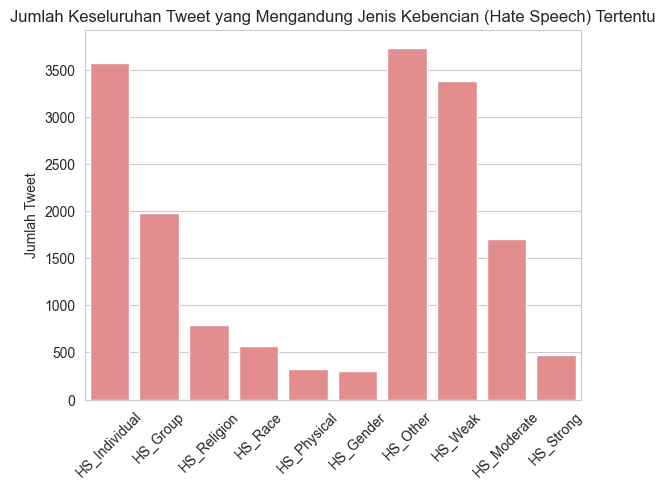

In [49]:
#Visualiasasi Tweet Hatespeech

sns.set_style('whitegrid')
sns.barplot(x=total.index, y=total.values, color='lightcoral')
plt.xticks(rotation=45)
plt.title('Jumlah Keseluruhan Tweet yang Mengandung Jenis Kebencian (Hate Speech) Tertentu')
plt.ylabel('Jumlah Tweet')
plt.show()

In [11]:
#Cek Shape data abusive dari data uji
df_tweet.Abusive.value_counts()

0    8126
1    5043
Name: Abusive, dtype: int64

Memberi label pada kalimat data tweet

In [12]:
#Memberi Label pada kalimat data tweet

import numpy as np

df_tweet['Label'] = np.where((df_tweet['HS'] == 0) & (df_tweet['Abusive'] == 0), 'Netral', 
                             np.where((df_tweet['HS'] == 1) & (df_tweet['Abusive'] == 0), 'Hatespeech',
                                      np.where((df_tweet['HS'] == 0) & (df_tweet['Abusive'] == 1), 'Abusive', 'Toxic')
                                              )
                                     )

print(df_tweet['Label'].unique())


['Toxic' 'Abusive' 'Netral' 'Hatespeech']


In [13]:
df_tweet.Label.value_counts()

Netral        5860
Toxic         3295
Hatespeech    2266
Abusive       1748
Name: Label, dtype: int64

In [14]:
#Memberi Label Sentiment pada data tweet

df_tweet['Sentiment'] = df_tweet['Label'].apply(lambda x: 'Positive' if x == 'Netral' else 'Negative')


In [15]:
df_tweet.Sentiment.value_counts()

Negative    7309
Positive    5860
Name: Sentiment, dtype: int64

In [16]:
#Cek Kolom dan Baris Data Tweet
df_tweet.shape

(13169, 16)

In [17]:
#Cek Data Tweet
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
 13  Total_HS       13169 non-null  int64 
 14  Label          13169 non-null  object
 15  Sentiment      13169 non-null  object
dtypes: int64(13), object(3)
memory usage: 1.6+ MB


Cek Missing Value dan Duplicated pada data tweet

In [18]:
#Cek Missing Values Data Tweet
df_tweet.isna().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
Total_HS         0
Label            0
Sentiment        0
dtype: int64

In [19]:
#Cek Duplicated Data Tweet

print('Masih ada {} duplicated data'.format(df_tweet.duplicated().sum()))

Masih ada 125 duplicated data


In [20]:
#Membersihkan Duplicate Data Tweet

df_tweet = df_tweet.drop_duplicates()
print('Masih ada {} duplicated data'.format(df_tweet.duplicated().sum()))
print('Duplicated data sudah di hapus')

Masih ada 0 duplicated data
Duplicated data sudah di hapus


In [21]:
#Cek data tweet yang dsudah dibersihkan

df_tweet.shape

(13044, 16)

Exploratory Data Analysis pada data tweet

In [22]:
#Cek Kolom Sentiment
df_tweet.Sentiment.value_counts()

Negative    7261
Positive    5783
Name: Sentiment, dtype: int64

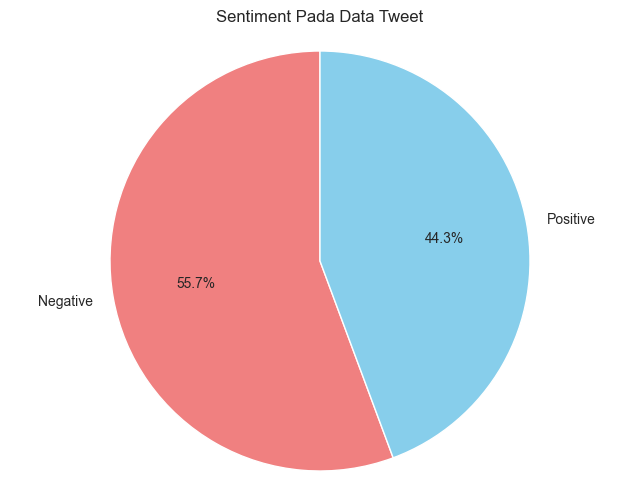

In [23]:
# Hitung jumlah tweet untuk setiap kategori sentiment
counts = df_tweet['Sentiment'].value_counts()

# Buat diagram lingkaran menggunakan Matplotlib
plt.figure(figsize=(8,6))
plt.title('Sentiment Pada Data Tweet')
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
plt.axis('equal')
plt.show()

In [24]:
#Cek Kolom Label pada data tweet
df_tweet.Label.value_counts()


Netral        5783
Toxic         3262
Hatespeech    2256
Abusive       1743
Name: Label, dtype: int64

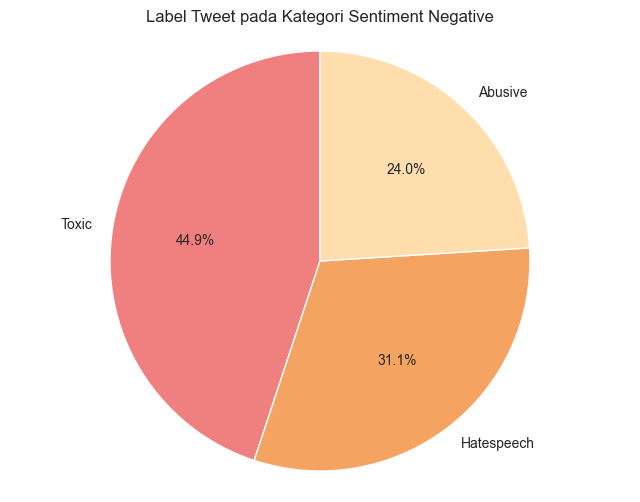

In [25]:
# Visualisasi label data tweet

# Hitung jumlah tweet untuk setiap kategori label
counts = df_tweet['Label'].value_counts()

# Hapus label "Netral"
counts = counts.drop("Netral")

# Buat visualisasi menggunakan Matplotlib
plt.figure(figsize=(8,6))
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'sandybrown', 'navajowhite'] )
plt.title('Label Tweet pada Kategori Sentiment Negative')
plt.axis('equal')
plt.show()

In [26]:
#Membuat Kolom Total Kata

df_tweet['total_kata'] = df_tweet['Tweet'].apply(lambda word: len(word.split()))

# Cek data tweet baru

df_tweet.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Total_HS,Label,Sentiment,total_kata
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,3,Toxic,Negative,25
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,0,Abusive,Negative,21
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,0,Netral,Positive,37
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,0,Netral,Positive,14
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,3,Toxic,Negative,14


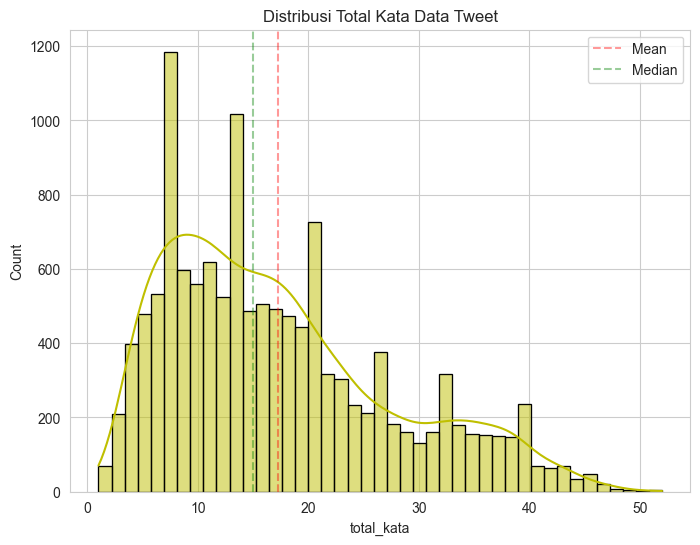

In [47]:
#Visualisasi distribusi kata pada data Tweet

sns.set_palette("colorblind") #memilih tema warna pada seaborn

fig = plt.figure(figsize=(8,6))

sns.histplot(data=df_tweet, x='total_kata', color='y', edgecolor='Black', kde=True)
plt.axvline(x=df_tweet['total_kata'].mean(), ls='--', color='r', alpha=0.4, label='Mean')
plt.axvline(x=df_tweet['total_kata'].median(), ls='--', color='g', alpha=0.4, label='Median')
plt.title('Distribusi Total Kata Data Tweet', size=12)
plt.legend()
plt.show()


In [48]:
#Nilai Mean dan Media pada Total Kata Data Tweet

print('Mean: {}'.format(df_tweet['total_kata'].mean()))
print('\t')
print('Median: {}'.format(df_tweet['total_kata'].median()))

Mean: 17.264259429622815
	
Median: 15.0


In [50]:
#Menyimpan data ke CSV untuk dilakukan Text Processing

# df_tweet.to_csv('tweet_data.csv', index=False)
